# FINAL CAPSTONE PROJECT SINGLE SOLUTION
#### IMAGE RECOGNITION USING MACHINE LEARNING MODELS

### Description:

- Dataset: https://www.cs.toronto.edu/~kriz/cifar.html
- Can also be accessed through Keras built in libary for Datasets.
- CIFAR-10 is a subset of 80 million tiny images dataset created by __Canadian Institute for Advanced Research (CIFAR)__.
- It consists of 60000 32x32x3 color images in 10 equal classes, (6000 images per class). 
- Each class of images corresponds to a physical object including airplane, automobile, bird, cat, deer, dog, etc.
- Images are divided in to a training and testing set, with 50,000 images in training and 10,000 images in testing set.


### Problem Summary
The purpose of this project is to build a multi class classification model which can successfully distinguish among all classes of the dataset. Our goal is to train and test different machine learning models as per our requirement and then come up with one specific model which will provide us with the best possible consistent results in a timely fashion. For this purpose we will train and test eleven different machine learning models, two each for Random Forest, Logistic Regression and Gradient Boost followed by 6 separate models for Convolutional Neural Networks.

### Recommended Solution
Among all, Model3 for convolutional neural networks provides us with the best possible results with a test loss of 0.886 and 81% accuracy for solving a multi class classification problem. It took 5 hours and 30 min to complete which proved to be the best possible time along with other metrics used to evaluate model performance among all the models tested in the present scenario. Random Forest performed above average among traditional machine learning models. However the results obtained by CNN far surpass the test scores for Random Forest.


### Table of Contents

- 1.0. Data Importation and Exploration


- 2.0. Plotting Images


- 3.0. Convolutional Neural Networks
    - 13.1. Preprocessing
    
    
- 4.0. CNN Model
     - 4.1. Model 3 Structure
     - 4.2. Model 3 Compilation
     - 4.3. Model 3 Accuracy
     - 4.4. Model 3 Predictions
     - 4.5. Model 3 Classification Report
     - 4.6. Model 3 Confusion Matrix - Type I
     - 4.7. Model 3 Confusion Matrix - Type II

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras_sequential_ascii import sequential_model_to_ascii_printout

import time
import itertools

import warnings
warnings.filterwarnings('ignore')

### 1.0. Data Importation and Exploration

In [147]:
from keras.datasets import cifar10

In [366]:
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

In [367]:
print(type(X_train))
print(type(y_train))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [368]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [369]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


### 2.0. Plotting Images

In [374]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [375]:
def plot_images(x, y, number_of_images=6):
    fig, axes1 = plt.subplots(number_of_images,number_of_images,figsize=(10,10))
    for j in range(number_of_images):
        for k in range(number_of_images):
            i = np.random.choice(range(len(x)))
            title = class_names[y[i:i+1][0][0]]
            axes1[j][k].title.set_text(title)
            axes1[j][k].set_axis_off()
            axes1[j][k].imshow(x[i:i+1][0]) 

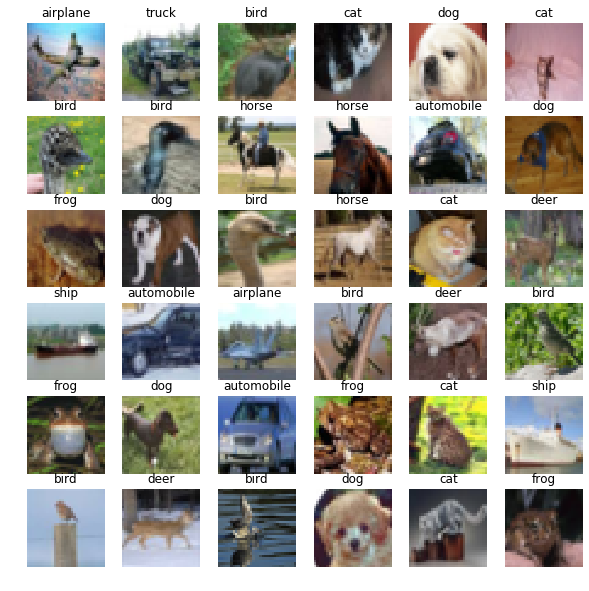

In [347]:
plot_images(X_train, y_train)

### 3.0. Convolutional Neural Networks

In [210]:
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [150]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)


In [151]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [152]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### 3.1. Preprocessing

In [153]:
# Convert to float32 for type consistency
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize values to 1 from 0 to 255 (256 values of piXels)
X_train /= 255
X_test /= 255

In [260]:
# Convert class vectors to binary class matrices
# So instead of one column with 10 values, create 10 binary columns
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### 4.0.  CNN Model 

In [184]:
# convolutional layers: 8, pooling 4, dense 2, dropout 5
# learning rate: .0001, batch size: 64, epochs 100

model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model3.add(Conv2D(32,(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
 
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3,3), padding='same',  activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


model3.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model3.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(260,(3,3),padding='same', activation='relu'))
model3.add(Conv2D(260,(3,3),padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
 
model3.add(Flatten())
model3.add(Dense(1000, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))
 
model3.summary()   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
__________

### 4.1. Model Structure

In [185]:
sequential_model_to_ascii_printout(model3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
              Conv2D    \|/  -------------------       896     0.1%
                relu   #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.6%
                relu   #####     30   30   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     15   15   32
             Dropout    | || -------------------         0     0.0%
                       #####     15   15   32
              Conv2D    \|/  -------------------     18496     1.3%
                relu   #####     15   15   64
              Conv2D    \|/  -------------------     36928     2.5%
                relu   #####     15   15   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      7    7   64
             Dropout    | || -------------------         0     0.0%
              

### 4.2. Model Compilation

In [186]:
model3.compile(Adam(lr=.0001), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

In [187]:
start = time.time()

mx3 = model3.fit(X_train, y_train,
                    batch_size=64,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("\nTotal time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 197s - loss: 1.9540 - acc: 0.2465 - val_loss: 1.6522 - val_acc: 0.3780
Epoch 2/100
 - 196s - loss: 1.6091 - acc: 0.3998 - val_loss: 1.4396 - val_acc: 0.4767
Epoch 3/100
 - 196s - loss: 1.4410 - acc: 0.4677 - val_loss: 1.4232 - val_acc: 0.4829
Epoch 4/100
 - 196s - loss: 1.3376 - acc: 0.5098 - val_loss: 1.2686 - val_acc: 0.5340
Epoch 5/100
 - 196s - loss: 1.2480 - acc: 0.5476 - val_loss: 1.1547 - val_acc: 0.5799
Epoch 6/100
 - 196s - loss: 1.1738 - acc: 0.5758 - val_loss: 1.0823 - val_acc: 0.6111
Epoch 7/100
 - 196s - loss: 1.1050 - acc: 0.6023 - val_loss: 1.0256 - val_acc: 0.6371
Epoch 8/100
 - 196s - loss: 1.0541 - acc: 0.6210 - val_loss: 1.0119 - val_acc: 0.6396
Epoch 9/100
 - 196s - loss: 1.0015 - acc: 0.6422 - val_loss: 0.9405 - val_acc: 0.6632
Epoch 10/100
 - 196s - loss: 0.9658 - acc: 0.6559 - val_loss: 0.9049 - val_acc: 0.6845
Epoch 11/100
 - 196s - loss: 0.9216 - acc: 0.6726 - val_loss: 0.8554 - val_acc: 0.7006
Ep

Epoch 95/100
 - 196s - loss: 0.1079 - acc: 0.9629 - val_loss: 0.8026 - val_acc: 0.8162
Epoch 96/100
 - 196s - loss: 0.1083 - acc: 0.9625 - val_loss: 0.8517 - val_acc: 0.8163
Epoch 97/100
 - 196s - loss: 0.1105 - acc: 0.9633 - val_loss: 0.8232 - val_acc: 0.8185
Epoch 98/100
 - 196s - loss: 0.1050 - acc: 0.9637 - val_loss: 0.9108 - val_acc: 0.8115
Epoch 99/100
 - 195s - loss: 0.1057 - acc: 0.9628 - val_loss: 0.8498 - val_acc: 0.8169
Epoch 100/100
 - 195s - loss: 0.0993 - acc: 0.9651 - val_loss: 0.8870 - val_acc: 0.8144

Total time: 05:28:11.04


### 4.3. Model Accuracy

In [188]:
score = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8869849464535713
Test accuracy: 0.8144


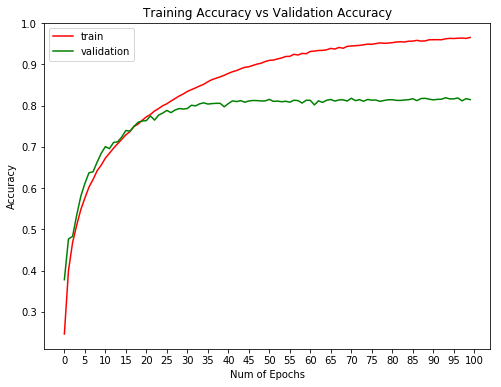

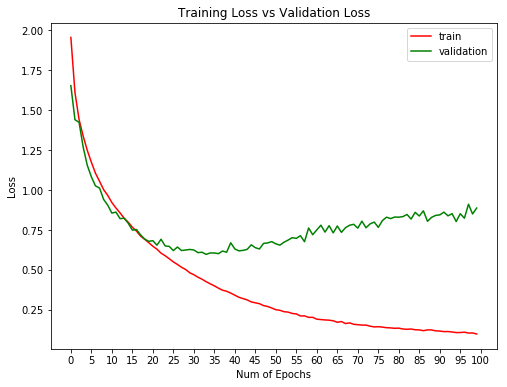

In [324]:
cnn_accuracy_charts (mx3)

### 4.4. Model Predictions

In [190]:
y_pred_M3 = model3.predict(X_test)

In [191]:
# Rounding the predictions
y_pred_M3 = model3.predict_classes(X_test)

In [192]:
print('y_test:\n', np.unique(y_test,return_counts=True))
print('\ny_pred_M2:\n', np.unique(y_pred_M3,return_counts=True))

y_test:
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))

y_pred_M2:
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([1071, 1032,  913,  856,  971, 1027,  994, 1070,  997, 1069],
      dtype=int64))


### 4.5. Model Classification Report

In [323]:
class_report(y_pred_M3)

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.89      0.91      0.90      1000
           2       0.79      0.72      0.75      1000
           3       0.70      0.60      0.64      1000
           4       0.80      0.78      0.79      1000
           5       0.71      0.73      0.72      1000
           6       0.86      0.85      0.86      1000
           7       0.83      0.88      0.85      1000
           8       0.89      0.89      0.89      1000
           9       0.86      0.91      0.88      1000

   micro avg       0.81      0.81      0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



### 4.6. Model Confusion Matrix - Type I

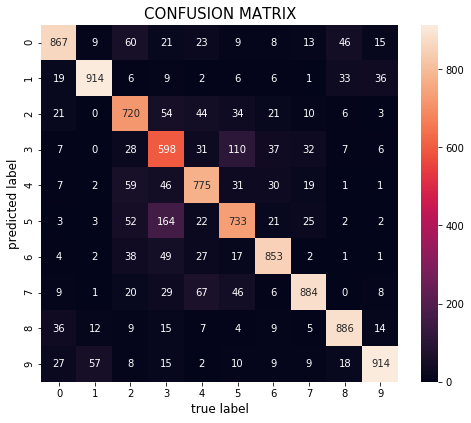

In [322]:
conf_matrix_cnn(y_pred_M3)

### 4.7. Model Confusion Matrix - Type II

Confusion matrix, without normalization
[[867  19  21   7   7   3   4   9  36  27]
 [  9 914   0   0   2   3   2   1  12  57]
 [ 60   6 720  28  59  52  38  20   9   8]
 [ 21   9  54 598  46 164  49  29  15  15]
 [ 23   2  44  31 775  22  27  67   7   2]
 [  9   6  34 110  31 733  17  46   4  10]
 [  8   6  21  37  30  21 853   6   9   9]
 [ 13   1  10  32  19  25   2 884   5   9]
 [ 46  33   6   7   1   2   1   0 886  18]
 [ 15  36   3   6   1   2   1   8  14 914]]


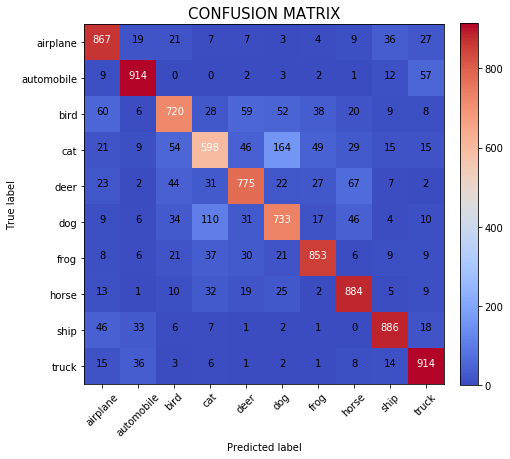

In [321]:
plot_confusion_matrix(y_pred_M3, cm_plot_labels, title='Confusion Matrix')